In [264]:
from dracoranalysis import collect_primary_data, separate_value_by_genre, mp_ac, \
    map_characters_to_social

In [265]:
import os
import re
import nltk
import unidecode
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from bs4 import BeautifulSoup, Comment

In [266]:
comedies_datalist = []
for filename in os.listdir('extended-corpus/comedy/'):
    with open('extended-corpus/comedy/'+filename, encoding='utf-8') as f:
        tei_text = f.read()
    primary_data = collect_primary_data(BeautifulSoup(tei_text, 'lxml'))
    comedies_datalist.append(
        {
            'name': filename[:-4],
            'date': primary_data[0],
            'characters': primary_data[1],
            'verses': primary_data[2],
            'cues': primary_data[3],
            'scenes': primary_data[4],
            'breaking_verses': primary_data[5],
            'tei': tei_text
        }
    )

In [267]:
tragedies_datalist = []
for filename in os.listdir('extended-corpus/tragedy/'):
    with open('extended-corpus/tragedy/'+filename, encoding='utf-8') as f:
        tei_text = f.read()
    primary_data = collect_primary_data(BeautifulSoup(tei_text, 'lxml'))
    tragedies_datalist.append(
        {
            'name': filename[:-4],
            'date': primary_data[0],
            'characters': primary_data[1],
            'verses': primary_data[2],
            'cues': primary_data[3],
            'scenes': primary_data[4],
            'breaking_verses': primary_data[5],
            'tei': tei_text
        }
    )

In [268]:
comedies_df = pd.DataFrame(comedies_datalist)

In [269]:
tragedies_df = pd.DataFrame(tragedies_datalist)

In [270]:
tragedies_df['genre'] = 'tragedy'
comedies_df['genre'] = 'comedy'

In [271]:
df_plays = pd.concat([comedies_df, tragedies_df])

In [273]:
#somehow in slipped through (beforq 1620)
df_plays = df_plays[df_plays['name'] != 'viau-pyrame']

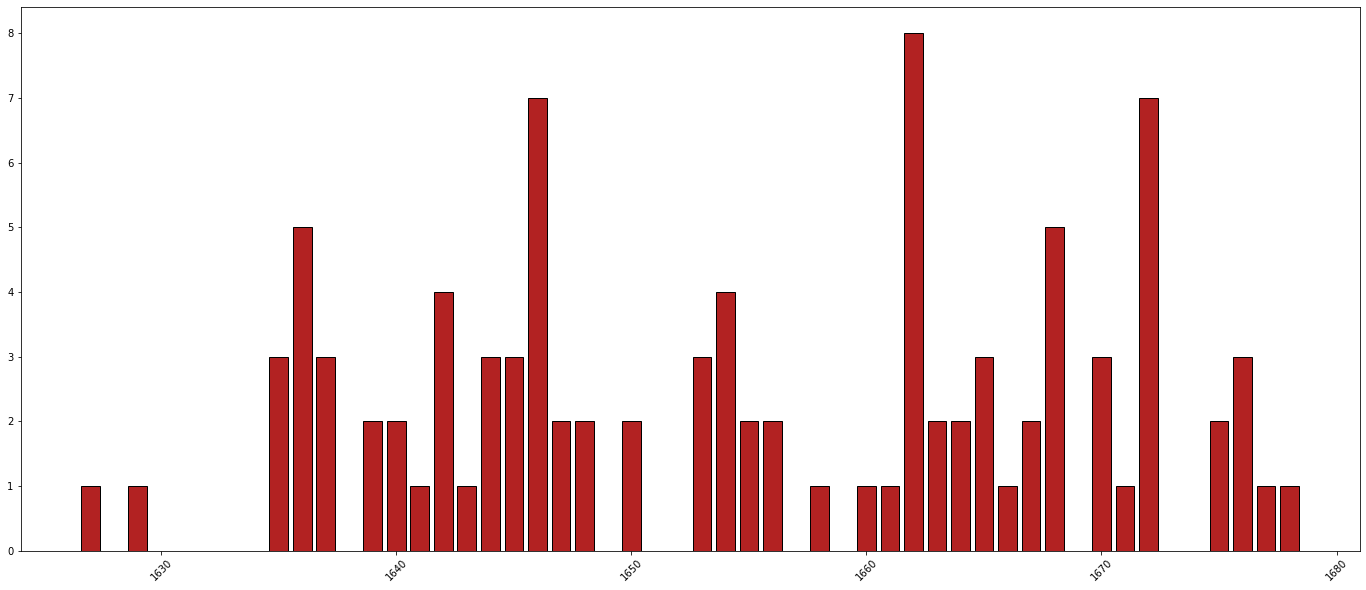

In [274]:
years = []
amounts = []
figure(figsize=(24,10))
for item in Counter(df_plays['date']).items():
    years.append(item[0])
    amounts.append(item[1])
plt.xticks(rotation=45)
# plt.title('Distribution of Extended Corpus by year')
plt.bar(years, amounts, color='firebrick', edgecolor='black')
plt.show()

In [275]:
comedies_df.verses.mean()

1307.46

In [276]:
comedies_df.cues.mean()

473.9

In [277]:
tragedies_df.verses.mean()

1730.7291666666667

In [278]:
tragedies_df.cues.mean()

293.5833333333333

## Dialogue

### Vivacity

In [122]:
df_plays['vivacity'] = df_plays.cues / df_plays.verses

In [30]:
vivacity_by_genre = separate_value_by_genre(df_plays, 'vivacity')

In [239]:
vivacity_by_genre['comedy'].mean()

0.37002767603376135

In [240]:
vivacity_by_genre['tragedy'].mean()

0.16909370905201865

In [241]:
vivacity_by_genre['comedy'].mean() / vivacity_by_genre['tragedy'].mean()

2.1882994826255127

In [34]:
mp, ac = mp_ac(
    sorted(vivacity_by_genre['comedy'])[::-1],
    sorted(vivacity_by_genre['tragedy'])[::-1]
    )

In [35]:
transgression = mp/ac
transgression

0.09825202141173926

### Stichomity

In [36]:
df_plays['breaking_verses_ratio'] = df_plays['breaking_verses']/df_plays['cues']

In [37]:
breaking_verses_by_genre = separate_value_by_genre(df_plays, ['breaking_verses', 'breaking_verses_ratio'], name=True)

In [123]:
breaking_verses_by_genre['comedy'].T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
name,gillet-deniaise,quinault-comedie-sans-comedie,scarron-marquis-ridicule,donneau-de-vise-intrigues-de-la-loterie,chevalier-galants-ridicules,ouville-fausses-verites,scudery-fils-suppose,quinault-mere-coquette,corneillet-inconnu,chevalier-pedagogue-amoureux,...,somaize-proces-precieuses,montfleury-le-mariage-de-rien,boisrobert-amant-ridicule,l-estoile-intrigue-des-filous,poisson-holande-malade,gillet-campagnard,tristan-parasite,la-fontaine-eunuque,la-forge-joueuse-dupee,brosse-aveugle-clairvoyant
breaking_verses,323,195,247,250,19,260,39,319,238,134,...,19,31,28,132,84,250,199,156,48,44
breaking_verses_ratio,0.345455,0.302795,0.387755,0.447227,0.086364,0.399386,0.135417,0.36836,0.331015,0.261719,...,0.100529,0.169399,0.28866,0.255319,0.337349,0.357654,0.259452,0.220339,0.289157,0.120879


In [124]:
breaking_verses_by_genre['tragedy'].T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
name,magnon-artaxerxe,rotrou-antigone,prade-arsace,mairet-sophonisbe,corneillet-ariane,racine-bajazet,corneillet-theodat,benserade-cleopatre,cyrano-la-mort-d-agrippine,le-vayer-grand-selim,...,aubignac-pucelle,aure-dipne,baro-saint-eustache,leclerc-iphigenie,aure-genevieve-70,gilbert-amours-de-diane-et-d-endymion,brosse-turne,abeille-coriolan,vallee-forte-romaine,pousset-de-montauban-zenobie
breaking_verses,71,35,49,41,68,81,70,42,50,60,...,32,215,134,43,246,55,35,93,13,49
breaking_verses_ratio,0.214502,0.095628,0.215859,0.176724,0.260536,0.307985,0.243902,0.195349,0.167224,0.244898,...,0.134454,0.366894,0.37535,0.182203,0.364985,0.141753,0.148305,0.382716,0.061905,0.20332


In [125]:
breaking_verses_by_genre['comedy']['breaking_verses_ratio'].mean()

0.27699728209324065

In [126]:
breaking_verses_by_genre['tragedy']['breaking_verses_ratio'].mean()

0.21984601429732786

### Dialogue weight


In [180]:
characters_df_list = []
for play in tqdm(df_plays.values):
    chars = []
    soup = BeautifulSoup(play[7], 'lxml')
    for castitem_tag in soup.find_all('person'):
        chars.append({'char_id': castitem_tag['xml:id'], 'play': play[0], 'genre': play[8], 'year': play[1]})
    for sp_tag in soup.find_all('sp'):
        who = sp_tag['who']
        for char in who.split():
            who_dict = next(item for item in chars if item["char_id"] == char[1:])
            if 'cue_amount' in who_dict:
                who_dict['cue_amount'] += 1
            else:
                who_dict['cue_amount'] = 1
            for l in sp_tag.find_all('l'):
                if 'verse_amount' in who_dict:
                    who_dict['verse_amount'] += 1
                else:
                    who_dict['verse_amount'] = 1
    characters_df_list.extend(chars)

  0%|          | 0/86 [00:00<?, ?it/s]

In [181]:
df_characters = pd.DataFrame(characters_df_list)

In [182]:
df_characters

,char_id,play,genre,year,cue_amount,verse_amount
0,climante,gillet-deniaise,comedy,1647,165,332.0
1,ariste,gillet-deniaise,comedy,1647,191,493.0
2,jodelet,gillet-deniaise,comedy,1647,125,285.0
3,olympe,gillet-deniaise,comedy,1647,130,240.0
4,oronte,gillet-deniaise,comedy,1647,160,329.0
...,...,...,...,...,...,...
1014,bajazet,pradon-mort-de-bajazet,tragedy,1676,27,263.0
1015,tamerlan,pradon-mort-de-bajazet,tragedy,1676,51,393.0
1016,asterie,pradon-mort-de-bajazet,tragedy,1676,60,486.0
1017,zaïde,pradon-mort-de-bajazet,tragedy,1676,9,30.0


In [189]:
def dialogue_weight(playname, cue_amnt, verse_amnt):
    cue_percentage = cue_amnt / df_characters_sum['cue_amount'][playname]
    verse_percentage = verse_amnt / df_characters_sum['verse_amount'][playname]
    return (cue_percentage + verse_percentage) / 2

In [190]:
df_characters['dialogue_weight'] = df_characters.apply(lambda x: dialogue_weight(x.play, x.cue_amount, x.verse_amount), axis=1)

In [295]:
df_characters.head()

,char_id,play,genre,year,cue_amount,verse_amount,dialogue_weight,dialogue_weight_cat,social_status
0,climante,gillet-deniaise,comedy,1647,165,332.0,0.161882,1.0,2
1,ariste,gillet-deniaise,comedy,1647,191,493.0,0.211500,1.0,2
2,jodelet,gillet-deniaise,comedy,1647,125,285.0,0.130066,1.0,2
3,olympe,gillet-deniaise,comedy,1647,130,240.0,0.122757,2.0,2
4,oronte,gillet-deniaise,comedy,1647,160,329.0,0.158543,1.0,2


In [194]:
dialogue_weight_quantiles = df_characters['dialogue_weight'].quantile([0.25,0.5,0.75])

In [195]:
def get_dialogue_weight_rank(value, quantiles):
    if value < quantiles[0.25]:
        return 4
    elif quantiles[0.25] <= value < quantiles[0.5]:
        return 3
    elif quantiles[0.5] <= value < quantiles[0.75]:
        return 2
    elif value >= quantiles[0.75]:
        return 1

In [196]:
df_characters['dialogue_weight_cat'] = df_characters.dialogue_weight.apply(lambda x: get_dialogue_weight_rank(
    x,
    dialogue_weight_quantiles
))

In [197]:
genre_to_weight = df_characters.groupby(['genre', 'dialogue_weight_cat']).count()['play']

In [198]:
genre_to_weight[:4] / genre_to_weight[:4].sum()

genre   dialogue_weight_cat
comedy  1.0                    0.248239
        2.0                    0.279930
        3.0                    0.272887
        4.0                    0.198944
Name: play, dtype: float64

In [199]:
genre_to_weight[4:] / genre_to_weight[4:].sum()

genre    dialogue_weight_cat
tragedy  1.0                    0.252232
         2.0                    0.212054
         3.0                    0.220982
         4.0                    0.314732
Name: play, dtype: float64

### Social types

In [127]:
char_types_df = pd.read_csv('data/character_social_types.tsv', sep='\t', header=None)

In [128]:
char_types = list(char_types_df[0])

In [284]:
social_characters_dict = {elem[0]: elem[1] for elem in char_types_df.values}

In [285]:
social_characters_dict['comtesse'] = 1

In [286]:
social_stati_count_list = []
for root, subdirs, files in os.walk('extended-corpus'):
    for file in files:
        with open(root+'/'+file, encoding='utf-8') as f:
            tei_text = f.read()
        soup = BeautifulSoup(tei_text, 'lxml')
        social_stati_count_list.append({**map_characters_to_social(soup, social_characters_dict, source=False), **{'name': file[:-4]}})

In [287]:
df_plays = pd.merge(df_plays, pd.DataFrame(social_stati_count_list).drop(83), on='name')
# 83: statuses not annotated

In [288]:
df_plays.head()

,name,date,characters,verses,cues,scenes,breaking_verses,tei,genre,social_0_character_amount_x,social_1_character_amount_x,social_2_character_amount_x,social_3_character_amount_x,social_None_character_amount_x,social_0_character_amount_y,social_1_character_amount_y,social_2_character_amount_y,social_3_character_amount_y,social_None_character_amount_y
0,gillet-deniaise,1647,12,1931,935,33,323,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,0,14,0,NaN,0,0,14,0,NaN
1,quinault-comedie-sans-comedie,1655,32,1716,644,38,195,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,17,63,28,NaN,0,17,63,28,NaN
2,scarron-marquis-ridicule,1646,10,1656,637,24,247,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,5,5,0,NaN,0,5,5,0,NaN
3,donneau-de-vise-intrigues-de-la-loterie,1663,18,1010,559,37,250,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,0,16,0,NaN,0,0,16,0,NaN
4,chevalier-galants-ridicules,1672,8,673,220,16,19,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,1,7,0,NaN,0,1,7,0,NaN


In [289]:
plays_dict = {play[0]: BeautifulSoup(play[7], 'lxml') for play in df_plays.values}

In [290]:
plays_social_speech_dict = {}
for play in plays_dict:
    role_ids_and_social_dict = {}
    missed_ids = []
    play_social_speech = {
        0: [],
        1: [],
        2: [],
        3: [],
    }
    cast = plays_dict[play].find_all('castitem')
    for castitem_tag in cast:
        properties = castitem_tag(text=lambda text: isinstance(text, Comment))
        role_id = castitem_tag.find('role')['corresp']
        if 'statut' in properties[2]:
            statut = properties[2].split('=')[1].strip('"')
            statut_number = social_characters_dict[statut]
        else:
            print(properties[2])
        role_ids_and_social_dict[role_id] = statut_number
    for sp_tag in plays_dict[play].find_all('sp'):
        try:
            play_social_speech[role_ids_and_social_dict[sp_tag['who']]].extend(sp_tag.find_all('l'))
        except KeyError:
            if sp_tag['who'] not in missed_ids:
                with open('data/tmp/key_mismatch.tsv', 'a', encoding='utf-8') as fw:
                    fw.write(f'{play}\t{sp_tag["who"]}\t{"+".join(role_ids_and_social_dict.keys())}\n')
                missed_ids.append(sp_tag['who'])
    plays_social_speech_dict[play] = play_social_speech

In [291]:
plays_social_speech_proportions = {}
for play in plays_social_speech_dict:
    plays_social_speech_proportions[play] = {}
    for key in plays_social_speech_dict[play]:
        plays_social_speech_proportions[play][f'social_{key}_lines'] = len(plays_social_speech_dict[play][key])

In [205]:
df_line_quantity = pd.DataFrame.from_dict(plays_social_speech_proportions).T
df_line_proportions = df_line_quantity.div(df_line_quantity.sum(axis=1), axis=0)

In [206]:
df_line_proportions.reset_index().head()

,index,social_0_lines,social_1_lines,social_2_lines,social_3_lines
0,gillet-deniaise,0.0,0.000000,1.000000,0.000000
1,quinault-comedie-sans-comedie,0.0,0.156398,0.730384,0.113217
2,scarron-marquis-ridicule,0.0,0.745717,0.254283,0.000000
3,donneau-de-vise-intrigues-de-la-loterie,0.0,0.000000,1.000000,0.000000
4,chevalier-galants-ridicules,0.0,0.000000,1.000000,0.000000


In [137]:
df_plays = pd.merge(df_plays, df_line_proportions.reset_index(), left_on='name', right_on='index')

In [138]:
df_plays = df_plays.drop('index', axis=1)

In [139]:
df_plays.head()

,name,date,characters,verses,cues,scenes,breaking_verses,tei,genre,vivacity,social_0_character_amount,social_1_character_amount,social_2_character_amount,social_3_character_amount,social_None_character_amount,social_0_lines,social_1_lines,social_2_lines,social_3_lines
0,gillet-deniaise,1647,12,1931,935,33,323,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.484205,0,0,14,0,NaN,0.0,0.000000,1.000000,0.000000
1,quinault-comedie-sans-comedie,1655,32,1716,644,38,195,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.375291,0,17,63,28,NaN,0.0,0.156398,0.730384,0.113217
2,scarron-marquis-ridicule,1646,10,1656,637,24,247,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.384662,0,5,5,0,NaN,0.0,0.745717,0.254283,0.000000
3,donneau-de-vise-intrigues-de-la-loterie,1663,18,1010,559,37,250,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.553465,0,0,16,0,NaN,0.0,0.000000,1.000000,0.000000
4,chevalier-galants-ridicules,1672,8,673,220,16,19,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.326895,0,1,7,0,NaN,0.0,0.000000,1.000000,0.000000


In [140]:
df_plays.groupby(['genre']).sum()[
    [
        'social_0_character_amount',
        'social_1_character_amount',
        'social_2_character_amount',
        'social_3_character_amount'
    ]
]

,social_0_character_amount,social_1_character_amount,social_2_character_amount,social_3_character_amount
genre,,,,
comedy,2,135,421,77
tragedy,73,176,120,72


In [141]:
df_plays.groupby(['genre']).mean()[
    [
        'social_0_lines',
        'social_1_lines',
        'social_2_lines',
        'social_3_lines'
    ]
]

,social_0_lines,social_1_lines,social_2_lines,social_3_lines
genre,,,,
comedy,0.000000,0.264639,0.643825,0.091536
tragedy,0.317039,0.515990,0.100350,0.066621


### Stage directions

In [296]:
play_stage_directions = []
non_action_stage_types = ['', 'AWAY', 'C', 'GET',"L'EMPEREUR", 'toward', 'toward/', 'decor', 'exit', 'entrance', 'alone']
for play in plays_dict:
    stage_directions = []
    soup = plays_dict[play]
    uncommented_stage_tags = soup.find_all('stage')
    commented_stage_tags = soup(text=lambda text: isinstance(text, Comment) and '@stage' in text)
    for tag in uncommented_stage_tags:
        if 'type' in tag.attrs and tag['type'] not in non_action_stage_types:
            stage_directions.append(tag['type'])
    for tag in commented_stage_tags:
        if tag.split('"')[-2] not in non_action_stage_types:
            stage_directions.append(tag.split('"')[-2])
    play_stage_directions.append({'name': play, 'stage_direction_count': len(stage_directions)})
            

In [297]:
df_plays_with_stage = df_plays.merge(
    pd.DataFrame(play_stage_directions), on='name'
)

In [298]:
df_plays_with_stage.groupby('genre').mean()['stage_direction_count']

genre
comedy     38.122449
tragedy    15.595745
Name: stage_direction_count, dtype: float64

In [299]:
df_plays_with_stage['stage_direction_on_verses'] = df_plays_with_stage['stage_direction_count'] /\
    df_plays_with_stage['verses']

In [300]:
df_plays_with_stage.head()

,name,date,characters,verses,cues,scenes,breaking_verses,tei,genre,social_0_character_amount_x,...,social_2_character_amount_x,social_3_character_amount_x,social_None_character_amount_x,social_0_character_amount_y,social_1_character_amount_y,social_2_character_amount_y,social_3_character_amount_y,social_None_character_amount_y,stage_direction_count,stage_direction_on_verses
0,gillet-deniaise,1647,12,1931,935,33,323,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,...,14,0,NaN,0,0,14,0,NaN,94,0.048679
1,quinault-comedie-sans-comedie,1655,32,1716,644,38,195,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,...,63,28,NaN,0,17,63,28,NaN,68,0.039627
2,scarron-marquis-ridicule,1646,10,1656,637,24,247,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,...,5,0,NaN,0,5,5,0,NaN,52,0.031401
3,donneau-de-vise-intrigues-de-la-loterie,1663,18,1010,559,37,250,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,...,16,0,NaN,0,0,16,0,NaN,40,0.039604
4,chevalier-galants-ridicules,1672,8,673,220,16,19,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0,...,7,0,NaN,0,1,7,0,NaN,15,0.022288


In [301]:
df_plays_with_stage.groupby('genre').mean()['stage_direction_on_verses']

genre
comedy     0.027643
tragedy    0.008903
Name: stage_direction_on_verses, dtype: float64

In [308]:
df_plays['mobility_rhythm'] = df_plays['scenes'] / df_plays['verses'] * 10000

In [309]:
df_plays.groupby('genre').mean()['mobility_rhythm']

genre
comedy     195.426597
tragedy    159.092222
Name: mobility_rhythm, dtype: float64